## 14-5장. 데이터 분석 예제 - 2012 Federal Election Commission

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', palette="pastel")

import warnings
warnings.filterwarnings("ignore")

- 미국 연방선거관리 위원회가 수집한 2012년 대통령 선거 데이터 (민주당: 오바마, 공화당: 롬니) 
- 후원금 기부자 성명, 직업, 고용형태, 주소, 기부금액 등
- csv file, 150 MB 

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
print( fec.shape ) 
fec.head()

(1001731, 16)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
#### 정당에 대한 정보가 없다. 후보자 이름으로부터 민주당/공화당 여부를 파악하여 추가하자 
unique_cand = fec['cand_nm'].unique()
unique_cand

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [4]:
#### 후보자별 소속정당 정보 
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [5]:
#### map 함수로 후보자 이름과 정당을 매칭시킨다. 
fec['party'] = fec.cand_nm.map(parties)
fec.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican


In [6]:
#### 환불 때문에 기부금액 컬럼에 마이너스가 존재 --> 양수만 골라내자 
fec = fec[fec['contb_receipt_amt'] > 0]
fec.shape

(991475, 17)

In [7]:
#### 민주, 공화 대표후보인 오바마와 롬니에 대한 것만 추린다. 
fec_main = fec[ fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])  ]
fec_main.shape

(694282, 17)

In [8]:
##########################################################################
############ 1. 직업별로 특정 후보에게 많이 기부한 경향이 존재하는가? 
##########################################################################

In [9]:
fec_main['contbr_occupation'].value_counts().head(10)

RETIRED                                   177473
ATTORNEY                                   30133
INFORMATION REQUESTED                      24747
HOMEMAKER                                  19626
PHYSICIAN                                  17206
INFORMATION REQUESTED PER BEST EFFORTS     12545
PROFESSOR                                  11804
TEACHER                                    11512
CONSULTANT                                 10061
NOT EMPLOYED                                9696
Name: contbr_occupation, dtype: int64

- 기부를 많이한 직업군 : 은퇴자 > 변호사 > 주부 > (내과)의사 > 교수 > 교사 > 컨설턴트 순

In [10]:
Obama = fec_main[fec_main['cand_nm'] == 'Obama, Barack']
Romney = fec_main[fec_main['cand_nm'] == 'Romney, Mitt']

print ( Obama['contbr_occupation'].value_counts().head(10) ) 
print ('-------------------------------------------------------------------')
Romney['contbr_occupation'].value_counts().head(10)

RETIRED                  151115
INFORMATION REQUESTED     24747
ATTORNEY                  24451
PHYSICIAN                 14845
HOMEMAKER                 12773
PROFESSOR                 11545
TEACHER                   11163
NOT EMPLOYED               9696
CONSULTANT                 8430
LAWYER                     7431
Name: contbr_occupation, dtype: int64
-------------------------------------------------------------------


RETIRED                                   26358
INFORMATION REQUESTED PER BEST EFFORTS    12545
HOMEMAKER                                  6853
ATTORNEY                                   5682
PHYSICIAN                                  2361
PRESIDENT                                  1877
CONSULTANT                                 1631
EXECUTIVE                                  1620
SELF-EMPLOYED                              1397
C.E.O.                                     1255
Name: contbr_occupation, dtype: int64

In [12]:
##### 피봇으로 정당&직업별 집계 후, 기부금액 2백만불 이상만 추출 
by_occupation = fec_main.pivot_table('contb_receipt_amt', index= 'contbr_occupation', columns= 'party', aggfunc=sum)
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN


In [14]:
by_occupation_2m = by_occupation[by_occupation.sum(axis = 1) > 2000000]
by_occupation_2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
CEO,2073284.79,355910.92
CONSULTANT,2459912.71,1424894.01
EXECUTIVE,1355161.05,2300947.03
HOMEMAKER,4248875.80,8147446.22
INFORMATION REQUESTED,4866973.96,NaN
INFORMATION REQUESTED PER BEST EFFORTS,NaN,11396894.84
INVESTOR,884133.00,1537595.12
LAWYER,3160478.87,7705.20


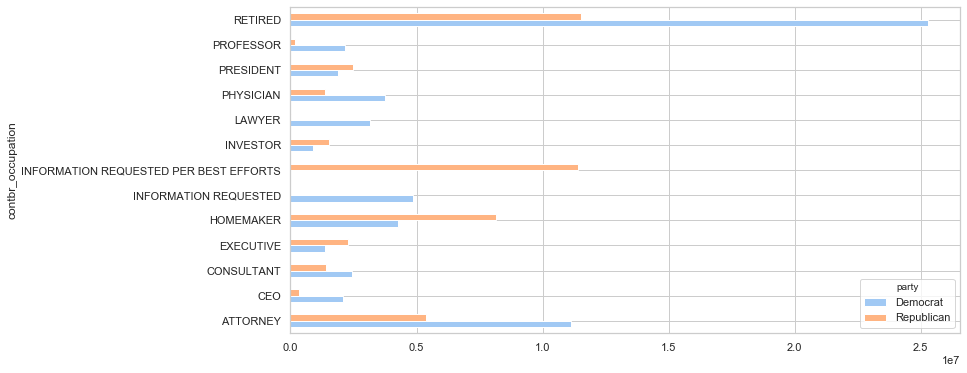

In [16]:
by_occupation_2m.plot(kind='barh', figsize=(12,6))

- 민주당(오바마)는 은퇴자, 교수, 의사, 변호사 / - 공화당(롬니)는 기업의 중역, 주부들이 많이 기부하는 경향이 보인다. 

In [17]:
##########################################################################
############ 2. 오바마와 롬니의 기부금액을 분석해 보자 
##########################################################################

In [28]:
print( '기부금액의 평균은 = ', fec_main['contb_receipt_amt'].mean() )
print( '기부금액의 중앙값은 = ', fec_main['contb_receipt_amt'].median() )
print( '최대 기부금액은 = ', fec_main['contb_receipt_amt'].max() )
print( '최소 기부금액은 = ', fec_main['contb_receipt_amt'].min() )

기부금액의 평균은 =  322.94274483567307
기부금액의 중앙값은 =  100.0
최대 기부금액은 =  2014490.51
최소 기부금액은 =  0.01


In [19]:
#### bin, cut을 사용하여 기부금액을 계층화 하자 
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_main['contb_receipt_amt'], bins )
labels 

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [38]:
#### cf. index = 411의 기부금액이 25$ 이므로, 위에서(labels) 411을 bin(10, 100)으로 구분한 것임 
fec_main.loc[411]

cmte_id                            C00431171
cand_id                            P80003353
cand_nm                         Romney, Mitt
contbr_nm                 ELDERBAUM, WILLIAM
contbr_city                              DPO
contbr_st                                 AA
contbr_zip                        3.4023e+08
contbr_employer                US GOVERNMENT
contbr_occupation    FOREIGN SERVICE OFFICER
contb_receipt_amt                         25
contb_receipt_dt                   01-FEB-12
receipt_desc                             NaN
memo_cd                                  NaN
memo_text                                NaN
form_tp                                SA17A
file_num                              780124
party                             Republican
Name: 411, dtype: object

In [39]:
#### 오바마와 롬니의 기부금액으로 histogram 그리기 
grouped = fec_main.groupby(['cand_nm', labels])
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64

In [40]:
#### unstack 옵션으로 오바마와 롬니를 구분해 주자 
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


- 건수로 보면 1천~1만$ 구간만 두 후보가 비슷하고, 나머지 구간들에서는 오바마가 상대적으로 많았음을 알 수 있다. 

In [43]:
#### 위의 테이블을 정규화하여 비율로 표시해보자 
#### (1) 먼저 구간(bins)별 기부금액의 합계를 구하고, 
grouped_sum = grouped['contb_receipt_amt'].sum().unstack(0)    
grouped_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [44]:
### (2) 기부금액 합계를 행의 합계로 나눠준다. 
grouped_percent = grouped_sum.div(grouped_sum.sum(axis=1), axis=0)
grouped_percent

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


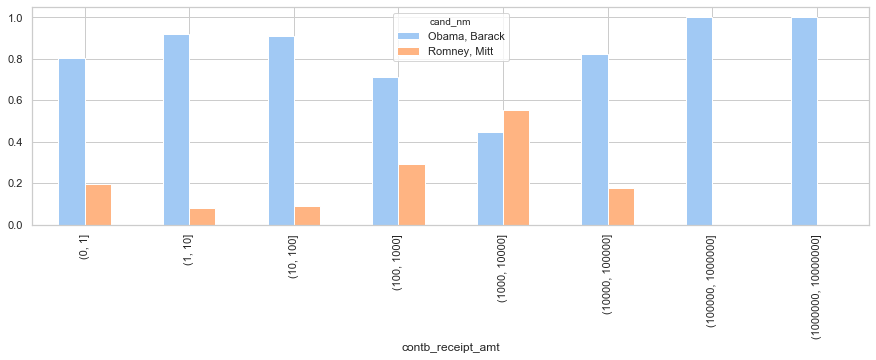

In [55]:
grouped_percent.plot(kind='bar', figsize = (15,4))

In [49]:
#### 주의!! sum(axis = 0/1)은 합계의 기준을 설정한다. 
#### axis = 0인 경우 row, 즉 오바마와 롬니를 기준으로 합계를 구하고, 
#### axis = 1인 경우 columns, 즉 금액구간(bins)를 기준으로 합계를 구한다. 

print( grouped_sum.sum(axis=1) )
print ('----------------------------------')
print( grouped_sum.sum(axis=0) )

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716191e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64
----------------------------------
cand_nm
Obama, Barack    1.358774e+08
Romney, Mitt     8.833591e+07
dtype: float64


In [56]:
####################################################################################
############ 3. 오바마와 롬니가 각각 어떤 주에서 기부금을 더 많이 받았는지 분석해보자 
####################################################################################

In [58]:
grouped_state = fec_main.groupby(['cand_nm', 'contbr_st'])
grouped_state_sum = grouped_state['contb_receipt_amt'].sum().unstack(0)
grouped_state_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [59]:
grouped_state_percent = grouped_state_sum.div(grouped_state_sum.sum(axis=1), axis=0)
grouped_state_percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AB,1.000000,NaN
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


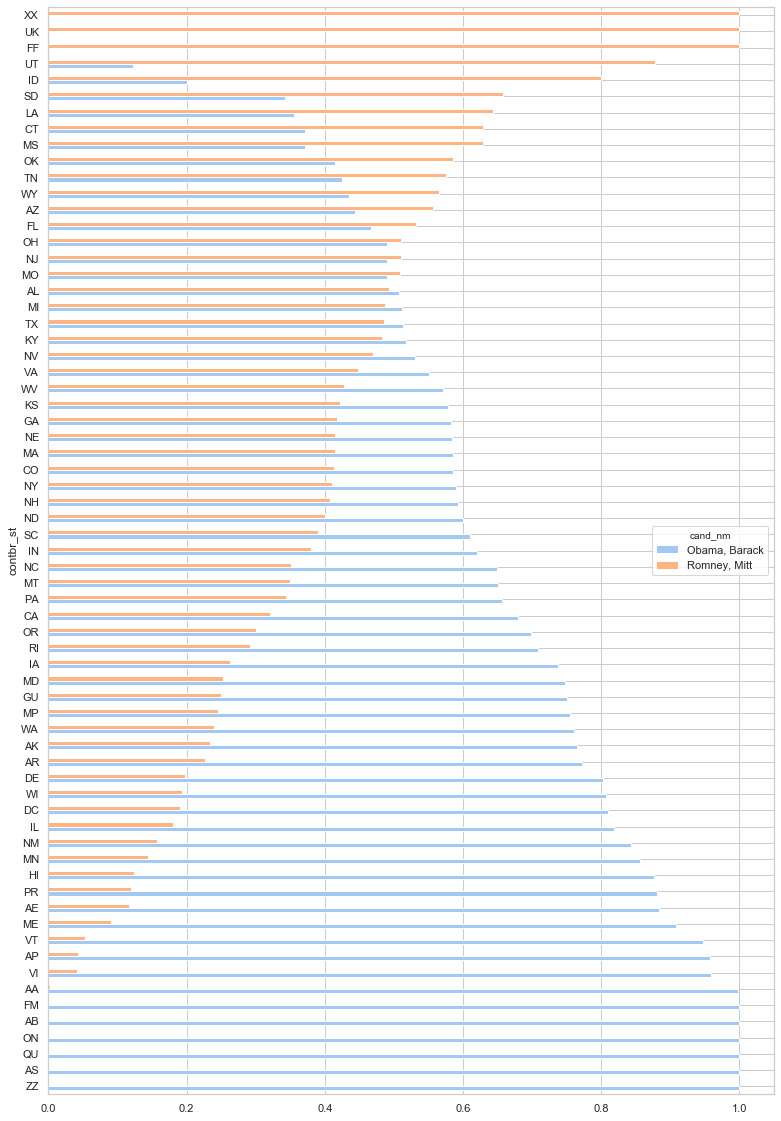

In [67]:
grouped_state_percent = grouped_state_percent.sort_values(by='Obama, Barack', ascending = False)
grouped_state_percent.plot(kind='barh', figsize=(13,20))

- 오바마 우세지역 : 버몬트, 메인, 하와이, 미네소타, 뉴멕시코, 인디애나 등 
- 롬니 우세지역 : 유타, 아이다호, 사우스코다, 루이지애나, 미시시피, 오클라호마 등 
- 중립 지역 : 뉴저지, 미주리, 앨라배머, 미시건 